# U2OS 24h

出力を可視化
```
r06c03f06p01
```

./visualize_predict_robustness/trial_wellplate_epoch100_batch28/U2OS_24h/r06c03f06p01
5
5


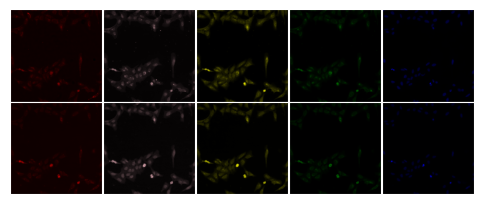

In [26]:
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
from skimage import io
import imageio
import os

def create_custom_cmap(start_color, end_color, n_intervals):
    # グラデーションを生成
    rgba_initial = np.array(mcolors.to_rgba(start_color))#初期色をRGBA形式に
    rgba_end = np.array(mcolors.to_rgba(end_color)) #最終色をRGBA形式に
    colors = [rgba_initial * (1 - i) + rgba_end * i for i in np.linspace(0, 1, n_intervals)]#初期色と最終色を混ぜる
    return mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

exp_name = 'trial_wellplate_epoch100_batch28'
id_name = 'r06c03f06p01'
test_name = 'U2OS_24h'
save_dir = f'./visualize_predict_robustness/{exp_name}/{test_name}/{id_name}'
print(save_dir)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

color_table = {
  "ch1": create_custom_cmap('black', 'red', 2**16),
  "ch2": create_custom_cmap('black', 'pink', 2**16),
  "ch3": create_custom_cmap('black', 'yellow', 2**16),
  "ch4": create_custom_cmap('black', 'green', 2**16),
  "ch5": create_custom_cmap('black', 'blue', 2**16),
}

true_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/wsb/{exp_name}/train_fold1_20240301-012459/test_{test_name}/images/{id_name}/GT'
true_img_paths = sorted(glob(f"{true_root}/*.tif"))
print(len(true_img_paths))

# palette_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/palette/{exp_name}/train_fold3_20240324-100652/test_{test_name}/images/BR00117011__2020-11-08T19_57_47-Measurement1/Images/{id_name}/Out'
# palette_img_paths = sorted(glob(f"{palette_root}/*.tif"))
# print(len(palette_img_paths))

# guided_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/guidedI2I/{exp_name}/train_fold2_20240320-122149/test_{test_name}/images/BR00117011__2020-11-08T19_57_47-Measurement1/Images/{id_name}/Out'
# guided_img_paths = sorted(glob(f"{guided_root}/*.tif"))
# print(len(guided_img_paths))

# i2sb_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/i2sb/{exp_name}/train_fold5_20240315-101422/test_{test_name}/images/{id_name}/Predict'
# i2sb_img_paths = sorted(glob(f"{i2sb_root}/*.tif"))
# print(len(i2sb_img_paths))

wsb_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/wsb/{exp_name}/train_fold1_20240301-012459/test_{test_name}/images/{id_name}/Predict'
wsb_img_paths = sorted(glob(f"{wsb_root}/*.tif"))
print(len(wsb_img_paths))

# cwgangp_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/cwgangp/{exp_name}/train_fold5_20240319-094042/test_{test_name}/images/{id_name}'
# cwgangp_img_paths = sorted(glob(f"{cwgangp_root}/*.tif"))
# print(len(cwgangp_img_paths))

fig = plt.figure(figsize=(6,6))
cnt = 0
for i, img_path in enumerate(true_img_paths):
    cnt += 1
    ax = fig.add_subplot(5,5,cnt)
    img = io.imread(img_path)
    ax.imshow(img,cmap=color_table[f'ch{i+1}'])
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    #ax.axis('off')

# for i, img_path in enumerate(palette_img_paths):
#     cnt += 1
#     ax = fig.add_subplot(5,5,cnt)
#     img = io.imread(img_path)
#     ax.imshow(img,cmap=color_table[f'ch{i+1}'])
#     ax.spines['left'].set_color('white')
#     ax.spines['right'].set_color('white')
#     ax.spines['top'].set_color('white')
#     ax.spines['bottom'].set_color('white')
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     #ax.axis('off')

# for i, img_path in enumerate(guided_img_paths):
#     cnt += 1
#     ax = fig.add_subplot(5,5,cnt)
#     img = io.imread(img_path)
#     ax.imshow(img,cmap=color_table[f'ch{i+1}'])
#     ax.spines['left'].set_color('white')
#     ax.spines['right'].set_color('white')
#     ax.spines['top'].set_color('white')
#     ax.spines['bottom'].set_color('white')
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     #ax.axis('off')

# for i, img_path in enumerate(i2sb_img_paths):
#     cnt += 1
#     ax = fig.add_subplot(5,5,cnt)
#     img = io.imread(img_path)
#     ax.imshow(img,cmap=color_table[f'ch{i+1}'])
#     ax.spines['left'].set_color('white')
#     ax.spines['right'].set_color('white')
#     ax.spines['top'].set_color('white')
#     ax.spines['bottom'].set_color('white')
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     #ax.axis('off')

for i, img_path in enumerate(wsb_img_paths):
    cnt += 1
    ax = fig.add_subplot(5,5,cnt)
    img = io.imread(img_path)
    ax.imshow(img,cmap=color_table[f'ch{i+1}'])
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    #ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0) # left=0, right=1, bottom=0, top=1,
plt.savefig(f'{save_dir}/result_true_and_wsb.png',dpi=600,bbox_inches='tight', pad_inches=0,transparent=True)
plt.savefig(f'{save_dir}/result_true_and_wsb.pdf',dpi=600,bbox_inches='tight', pad_inches=0,transparent=True)
plt.show()

入力を可視化
```
BR00117024__2020-11-06T04_20_37-Measurement1
```

In [27]:
def check_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
    return path

#save_dir = check_dir(f'{save_dir}/input')
measurement_name = 'BR00117024__2020-11-06T04_20_37-Measurement1'

_ = check_dir(f'./visualize_ground_truth/illum')
_ = check_dir(f'./visualize_ground_truth/images/{measurement_name}/Images')

In [28]:
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch1sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch1sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch2sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch2sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch3sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch3sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch4sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch4sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch5sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch5sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch6sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch6sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch7sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch7sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch8sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117024__2020-11-06T04_20_37-Measurement1/Images/r06c03f06p01-ch8sk1fk1fl1.tiff
!scp -r morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/illum/BR00117024 /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/illum/BR00117024

r06c03f06p01-ch1sk1fk1fl1.tiff                100% 2267KB   8.0MB/s   00:00    
r06c03f06p01-ch2sk1fk1fl1.tiff                100% 2208KB   8.2MB/s   00:00    
r06c03f06p01-ch3sk1fk1fl1.tiff                100% 2264KB   8.3MB/s   00:00    
r06c03f06p01-ch4sk1fk1fl1.tiff                100% 2116KB   7.3MB/s   00:00    
r06c03f06p01-ch5sk1fk1fl1.tiff                100% 1948KB   8.6MB/s   00:00    
r06c03f06p01-ch6sk1fk1fl1.tiff                100% 2358KB   9.0MB/s   00:00    
r06c03f06p01-ch7sk1fk1fl1.tiff                100% 2336KB   8.1MB/s   00:00    
r06c03f06p01-ch8sk1fk1fl1.tiff                100% 2294KB   8.2MB/s   00:00    
BR00117024_IllumAGP.npy                       100% 4556KB  11.6MB/s   00:00    
BR00117024_IllumDNA.npy                       100% 4556KB  15.6MB/s   00:00    
BR00117024_IllumBrightfield.npy               100% 4556KB  16.8MB/s   00:00    
BR00117024_IllumMito.npy                      100% 4556KB  16.6MB/s   00:00    
BR00117024_IllumRNA.npy                 

In [29]:
from glob import glob
import numpy as np
from skimage import io
import imageio
import os
def _correct_image(root_path, filepath, channel_id, channel_table):
    img_path = f"{root_path}/images/{filepath}-{channel_id}sk1fk1fl1.tiff"
    id = filepath[:10]
    channel_name = channel_table[channel_id]
    correction_path = f"{root_path}/illum/{id}/{id}_Illum{channel_name}.npy"

    # Illumination correction
    img = io.imread(img_path)
    correction_function = np.load(correction_path, allow_pickle=True)
    img_corrected = img / correction_function
    return img_corrected

def save_image_function(save_dir, filename, img):
    if img.dtype == 'uint16':
        imageio.imwrite(f"{save_dir}/{filename}.tif", img)
    else:
        io.imsave(f"{save_dir}/{filename}.png",
                  img,
                  check_contrast=False)
        
channel_table = {
  "ch1": "Mito",
  "ch2": "AGP",
  "ch3": "RNA",
  "ch4": "ER",
  "ch5": "DNA",
  "ch6": "HighZBF",
  "ch7": "LowZBF",
  "ch8": "Brightfield"
}

root_path = './visualize_ground_truth'
filepath = f'{measurement_name}/Images/{id_name}'
channel_list = [f'ch{i+1}' for i in range(8)]

save_dir = f'./visualize_ground_truth/ground_truth/{filepath[:10]}/{filepath[-12:]}'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for channel_id in channel_list:
    corrected_img = _correct_image(root_path, filepath, channel_id, channel_table)
    corrected_img = corrected_img.astype('uint16')
    savefilename = f'{filepath[-12:]}-{channel_id}sk1fk1fl1_corrected'
    save_image_function(save_dir, savefilename, corrected_img)

# A549 48h

出力を可視化
```
r04c22f15p01
```

./visualize_predict_robustness/trial_wellplate_epoch100_batch28/A549_48h/r04c22f15p01
5
5


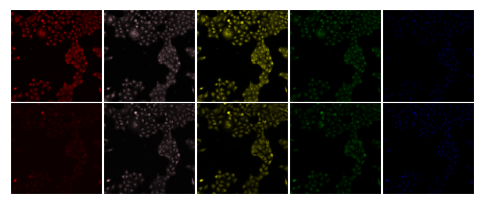

In [30]:
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
from skimage import io
import imageio
import os

def create_custom_cmap(start_color, end_color, n_intervals):
    # グラデーションを生成
    rgba_initial = np.array(mcolors.to_rgba(start_color))#初期色をRGBA形式に
    rgba_end = np.array(mcolors.to_rgba(end_color)) #最終色をRGBA形式に
    colors = [rgba_initial * (1 - i) + rgba_end * i for i in np.linspace(0, 1, n_intervals)]#初期色と最終色を混ぜる
    return mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

exp_name = 'trial_wellplate_epoch100_batch28'
id_name = 'r04c22f15p01'
test_name = 'A549_48h'
save_dir = f'./visualize_predict_robustness/{exp_name}/{test_name}/{id_name}'
print(save_dir)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

color_table = {
  "ch1": create_custom_cmap('black', 'red', 2**16),
  "ch2": create_custom_cmap('black', 'pink', 2**16),
  "ch3": create_custom_cmap('black', 'yellow', 2**16),
  "ch4": create_custom_cmap('black', 'green', 2**16),
  "ch5": create_custom_cmap('black', 'blue', 2**16),
}

true_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/wsb/{exp_name}/train_fold1_20240301-012459/test_{test_name}/images/{id_name}/GT'
true_img_paths = sorted(glob(f"{true_root}/*.tif"))
print(len(true_img_paths))

# palette_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/palette/{exp_name}/train_fold3_20240324-100652/test_{test_name}/images/BR00117011__2020-11-08T19_57_47-Measurement1/Images/{id_name}/Out'
# palette_img_paths = sorted(glob(f"{palette_root}/*.tif"))
# print(len(palette_img_paths))

# guided_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/guidedI2I/{exp_name}/train_fold2_20240320-122149/test_{test_name}/images/BR00117011__2020-11-08T19_57_47-Measurement1/Images/{id_name}/Out'
# guided_img_paths = sorted(glob(f"{guided_root}/*.tif"))
# print(len(guided_img_paths))

# i2sb_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/i2sb/{exp_name}/train_fold5_20240315-101422/test_{test_name}/images/{id_name}/Predict'
# i2sb_img_paths = sorted(glob(f"{i2sb_root}/*.tif"))
# print(len(i2sb_img_paths))

wsb_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/wsb/{exp_name}/train_fold1_20240301-012459/test_{test_name}/images/{id_name}/Predict'
wsb_img_paths = sorted(glob(f"{wsb_root}/*.tif"))
print(len(wsb_img_paths))

# cwgangp_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/cwgangp/{exp_name}/train_fold5_20240319-094042/test_{test_name}/images/{id_name}'
# cwgangp_img_paths = sorted(glob(f"{cwgangp_root}/*.tif"))
# print(len(cwgangp_img_paths))

fig = plt.figure(figsize=(6,6))
cnt = 0
for i, img_path in enumerate(true_img_paths):
    cnt += 1
    ax = fig.add_subplot(5,5,cnt)
    img = io.imread(img_path)
    ax.imshow(img,cmap=color_table[f'ch{i+1}'])
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    #ax.axis('off')

# for i, img_path in enumerate(palette_img_paths):
#     cnt += 1
#     ax = fig.add_subplot(5,5,cnt)
#     img = io.imread(img_path)
#     ax.imshow(img,cmap=color_table[f'ch{i+1}'])
#     ax.spines['left'].set_color('white')
#     ax.spines['right'].set_color('white')
#     ax.spines['top'].set_color('white')
#     ax.spines['bottom'].set_color('white')
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     #ax.axis('off')

# for i, img_path in enumerate(guided_img_paths):
#     cnt += 1
#     ax = fig.add_subplot(5,5,cnt)
#     img = io.imread(img_path)
#     ax.imshow(img,cmap=color_table[f'ch{i+1}'])
#     ax.spines['left'].set_color('white')
#     ax.spines['right'].set_color('white')
#     ax.spines['top'].set_color('white')
#     ax.spines['bottom'].set_color('white')
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     #ax.axis('off')

# for i, img_path in enumerate(i2sb_img_paths):
#     cnt += 1
#     ax = fig.add_subplot(5,5,cnt)
#     img = io.imread(img_path)
#     ax.imshow(img,cmap=color_table[f'ch{i+1}'])
#     ax.spines['left'].set_color('white')
#     ax.spines['right'].set_color('white')
#     ax.spines['top'].set_color('white')
#     ax.spines['bottom'].set_color('white')
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     #ax.axis('off')

for i, img_path in enumerate(wsb_img_paths):
    cnt += 1
    ax = fig.add_subplot(5,5,cnt)
    img = io.imread(img_path)
    ax.imshow(img,cmap=color_table[f'ch{i+1}'])
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    #ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0) # left=0, right=1, bottom=0, top=1,
plt.savefig(f'{save_dir}/result_true_and_wsb.png',dpi=600,bbox_inches='tight', pad_inches=0,transparent=True)
plt.savefig(f'{save_dir}/result_true_and_wsb.pdf',dpi=600,bbox_inches='tight', pad_inches=0,transparent=True)
plt.show()

入力を可視化
```
BR00117017__2020-11-10T18_25_46-Measurement1
```

In [31]:
def check_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
    return path

#save_dir = check_dir(f'{save_dir}/input')
measurement_name = 'BR00117017__2020-11-10T18_25_46-Measurement1'

_ = check_dir(f'./visualize_ground_truth/illum')
_ = check_dir(f'./visualize_ground_truth/images/{measurement_name}/Images')

In [32]:
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch1sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch1sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch2sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch2sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch3sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch3sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch4sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch4sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch5sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch5sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch6sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch6sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch7sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch7sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch8sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00117017__2020-11-10T18_25_46-Measurement1/Images/r04c22f15p01-ch8sk1fk1fl1.tiff
!scp -r morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/illum/BR00117017 /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/illum/BR00117017

r04c22f15p01-ch1sk1fk1fl1.tiff                100% 2145KB   8.4MB/s   00:00    
r04c22f15p01-ch2sk1fk1fl1.tiff                100% 2358KB   8.8MB/s   00:00    
r04c22f15p01-ch3sk1fk1fl1.tiff                100% 2540KB   9.5MB/s   00:00    
r04c22f15p01-ch4sk1fk1fl1.tiff                100% 2465KB   8.9MB/s   00:00    
r04c22f15p01-ch5sk1fk1fl1.tiff                100% 2141KB   6.0MB/s   00:00    
r04c22f15p01-ch6sk1fk1fl1.tiff                100% 2273KB   8.4MB/s   00:00    
r04c22f15p01-ch7sk1fk1fl1.tiff                100% 2353KB   8.8MB/s   00:00    
r04c22f15p01-ch8sk1fk1fl1.tiff                100% 2322KB   8.7MB/s   00:00    
BR00117017_IllumER.npy                        100% 4556KB   3.7MB/s   00:01    
BR00117017_IllumRNA.npy                       100% 4556KB   5.4MB/s   00:00    
BR00117017_IllumDNA.npy                       100% 4556KB   6.2MB/s   00:00    
BR00117017_IllumAGP.npy                       100% 4556KB   7.2MB/s   00:00    
BR00117017_IllumBrightfield.npy         

In [33]:
from glob import glob
import numpy as np
from skimage import io
import imageio
import os
def _correct_image(root_path, filepath, channel_id, channel_table):
    img_path = f"{root_path}/images/{filepath}-{channel_id}sk1fk1fl1.tiff"
    id = filepath[:10]
    channel_name = channel_table[channel_id]
    correction_path = f"{root_path}/illum/{id}/{id}_Illum{channel_name}.npy"

    # Illumination correction
    img = io.imread(img_path)
    correction_function = np.load(correction_path, allow_pickle=True)
    img_corrected = img / correction_function
    return img_corrected

def save_image_function(save_dir, filename, img):
    if img.dtype == 'uint16':
        imageio.imwrite(f"{save_dir}/{filename}.tif", img)
    else:
        io.imsave(f"{save_dir}/{filename}.png",
                  img,
                  check_contrast=False)
        
channel_table = {
  "ch1": "Mito",
  "ch2": "AGP",
  "ch3": "RNA",
  "ch4": "ER",
  "ch5": "DNA",
  "ch6": "HighZBF",
  "ch7": "LowZBF",
  "ch8": "Brightfield"
}

root_path = './visualize_ground_truth'
filepath = f'{measurement_name}/Images/{id_name}'
channel_list = [f'ch{i+1}' for i in range(8)]

save_dir = f'./visualize_ground_truth/ground_truth/{filepath[:10]}/{filepath[-12:]}'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for channel_id in channel_list:
    corrected_img = _correct_image(root_path, filepath, channel_id, channel_table)
    corrected_img = corrected_img.astype('uint16')
    savefilename = f'{filepath[-12:]}-{channel_id}sk1fk1fl1_corrected'
    save_image_function(save_dir, savefilename, corrected_img)

# A549 24h


出力を可視化
```
r07c16f04p01
```

./visualize_predict_robustness/trial_wellplate_epoch100_batch28/A549_24h/r07c16f04p01
5
5


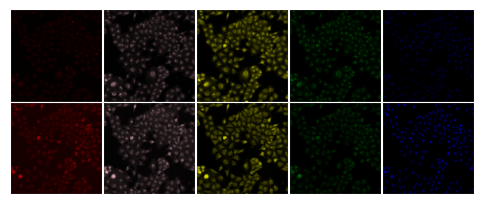

In [34]:
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
from skimage import io
import imageio
import os

def create_custom_cmap(start_color, end_color, n_intervals):
    # グラデーションを生成
    rgba_initial = np.array(mcolors.to_rgba(start_color))#初期色をRGBA形式に
    rgba_end = np.array(mcolors.to_rgba(end_color)) #最終色をRGBA形式に
    colors = [rgba_initial * (1 - i) + rgba_end * i for i in np.linspace(0, 1, n_intervals)]#初期色と最終色を混ぜる
    return mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

exp_name = 'trial_wellplate_epoch100_batch28'
id_name = 'r07c16f04p01'
test_name = 'A549_24h'
save_dir = f'./visualize_predict_robustness/{exp_name}/{test_name}/{id_name}'
print(save_dir)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

color_table = {
  "ch1": create_custom_cmap('black', 'red', 2**16),
  "ch2": create_custom_cmap('black', 'pink', 2**16),
  "ch3": create_custom_cmap('black', 'yellow', 2**16),
  "ch4": create_custom_cmap('black', 'green', 2**16),
  "ch5": create_custom_cmap('black', 'blue', 2**16),
}

true_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/wsb/{exp_name}/train_fold1_20240301-012459/test_{test_name}/images/{id_name}/GT'
true_img_paths = sorted(glob(f"{true_root}/*.tif"))
print(len(true_img_paths))

# palette_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/palette/{exp_name}/train_fold3_20240324-100652/test_{test_name}/images/BR00117011__2020-11-08T19_57_47-Measurement1/Images/{id_name}/Out'
# palette_img_paths = sorted(glob(f"{palette_root}/*.tif"))
# print(len(palette_img_paths))

# guided_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/guidedI2I/{exp_name}/train_fold2_20240320-122149/test_{test_name}/images/BR00117011__2020-11-08T19_57_47-Measurement1/Images/{id_name}/Out'
# guided_img_paths = sorted(glob(f"{guided_root}/*.tif"))
# print(len(guided_img_paths))

# i2sb_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/i2sb/{exp_name}/train_fold5_20240315-101422/test_{test_name}/images/{id_name}/Predict'
# i2sb_img_paths = sorted(glob(f"{i2sb_root}/*.tif"))
# print(len(i2sb_img_paths))

wsb_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/wsb/{exp_name}/train_fold1_20240301-012459/test_{test_name}/images/{id_name}/Predict'
wsb_img_paths = sorted(glob(f"{wsb_root}/*.tif"))
print(len(wsb_img_paths))

# cwgangp_root = f'/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/cwgangp/{exp_name}/train_fold5_20240319-094042/test_{test_name}/images/{id_name}'
# cwgangp_img_paths = sorted(glob(f"{cwgangp_root}/*.tif"))
# print(len(cwgangp_img_paths))

fig = plt.figure(figsize=(6,6))
cnt = 0
for i, img_path in enumerate(true_img_paths):
    cnt += 1
    ax = fig.add_subplot(5,5,cnt)
    img = io.imread(img_path)
    ax.imshow(img,cmap=color_table[f'ch{i+1}'])
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    #ax.axis('off')

# for i, img_path in enumerate(palette_img_paths):
#     cnt += 1
#     ax = fig.add_subplot(5,5,cnt)
#     img = io.imread(img_path)
#     ax.imshow(img,cmap=color_table[f'ch{i+1}'])
#     ax.spines['left'].set_color('white')
#     ax.spines['right'].set_color('white')
#     ax.spines['top'].set_color('white')
#     ax.spines['bottom'].set_color('white')
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     #ax.axis('off')

# for i, img_path in enumerate(guided_img_paths):
#     cnt += 1
#     ax = fig.add_subplot(5,5,cnt)
#     img = io.imread(img_path)
#     ax.imshow(img,cmap=color_table[f'ch{i+1}'])
#     ax.spines['left'].set_color('white')
#     ax.spines['right'].set_color('white')
#     ax.spines['top'].set_color('white')
#     ax.spines['bottom'].set_color('white')
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     #ax.axis('off')

# for i, img_path in enumerate(i2sb_img_paths):
#     cnt += 1
#     ax = fig.add_subplot(5,5,cnt)
#     img = io.imread(img_path)
#     ax.imshow(img,cmap=color_table[f'ch{i+1}'])
#     ax.spines['left'].set_color('white')
#     ax.spines['right'].set_color('white')
#     ax.spines['top'].set_color('white')
#     ax.spines['bottom'].set_color('white')
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
#     #ax.axis('off')

for i, img_path in enumerate(wsb_img_paths):
    cnt += 1
    ax = fig.add_subplot(5,5,cnt)
    img = io.imread(img_path)
    ax.imshow(img,cmap=color_table[f'ch{i+1}'])
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    #ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0) # left=0, right=1, bottom=0, top=1,
plt.savefig(f'{save_dir}/result_true_and_wsb.png',dpi=600,bbox_inches='tight', pad_inches=0,transparent=True)
plt.savefig(f'{save_dir}/result_true_and_wsb.pdf',dpi=600,bbox_inches='tight', pad_inches=0,transparent=True)
plt.show()

入力を可視化
```
BR00116993__2020-11-05T23_11_39-Measurement1
```

In [35]:
def check_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
    return path

#save_dir = check_dir(f'{save_dir}/input')
measurement_name = 'BR00116993__2020-11-05T23_11_39-Measurement1'

_ = check_dir(f'./visualize_ground_truth/illum')
_ = check_dir(f'./visualize_ground_truth/images/{measurement_name}/Images')

In [36]:
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch1sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch1sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch2sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch2sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch3sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch3sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch4sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch4sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch5sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch5sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch6sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch6sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch7sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch7sk1fk1fl1.tiff
!scp morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch8sk1fk1fl1.tiff /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/images/BR00116993__2020-11-05T23_11_39-Measurement1/Images/r07c16f04p01-ch8sk1fk1fl1.tiff
!scp -r morikura@v104:/data/Ozeki/JUMPCellPaintingDatasets/CellPaintingGallery/cpg0000-jump-pilot/source_4/images/2020_11_04_CPJUMP1/illum/BR00116993 /Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/notebooks/visualize_ground_truth/illum/BR00116993

r07c16f04p01-ch1sk1fk1fl1.tiff                100% 2630KB   9.5MB/s   00:00    
r07c16f04p01-ch2sk1fk1fl1.tiff                100% 2833KB   9.9MB/s   00:00    
r07c16f04p01-ch3sk1fk1fl1.tiff                100% 2890KB   8.7MB/s   00:00    
r07c16f04p01-ch4sk1fk1fl1.tiff                100% 2769KB   9.6MB/s   00:00    
r07c16f04p01-ch5sk1fk1fl1.tiff                100% 2249KB   5.8MB/s   00:00    
r07c16f04p01-ch6sk1fk1fl1.tiff                100% 2548KB   9.2MB/s   00:00    
r07c16f04p01-ch7sk1fk1fl1.tiff                100% 2486KB   8.8MB/s   00:00    
r07c16f04p01-ch8sk1fk1fl1.tiff                100% 2407KB   8.5MB/s   00:00    
BR00116993_IllumHighZBF.npy                   100% 4556KB  11.3MB/s   00:00    
BR00116993_IllumBrightfield.npy               100% 4556KB  15.6MB/s   00:00    
BR00116993_IllumLowZBF.npy                    100% 4556KB  17.2MB/s   00:00    
BR00116993_IllumMito.npy                      100% 4556KB  17.8MB/s   00:00    
BR00116993_IllumRNA.npy                 

In [37]:
from glob import glob
import numpy as np
from skimage import io
import imageio
import os
def _correct_image(root_path, filepath, channel_id, channel_table):
    img_path = f"{root_path}/images/{filepath}-{channel_id}sk1fk1fl1.tiff"
    id = filepath[:10]
    channel_name = channel_table[channel_id]
    correction_path = f"{root_path}/illum/{id}/{id}_Illum{channel_name}.npy"

    # Illumination correction
    img = io.imread(img_path)
    correction_function = np.load(correction_path, allow_pickle=True)
    img_corrected = img / correction_function
    return img_corrected

def save_image_function(save_dir, filename, img):
    if img.dtype == 'uint16':
        imageio.imwrite(f"{save_dir}/{filename}.tif", img)
    else:
        io.imsave(f"{save_dir}/{filename}.png",
                  img,
                  check_contrast=False)
        
channel_table = {
  "ch1": "Mito",
  "ch2": "AGP",
  "ch3": "RNA",
  "ch4": "ER",
  "ch5": "DNA",
  "ch6": "HighZBF",
  "ch7": "LowZBF",
  "ch8": "Brightfield"
}

root_path = './visualize_ground_truth'
filepath = f'{measurement_name}/Images/{id_name}'
channel_list = [f'ch{i+1}' for i in range(8)]

save_dir = f'./visualize_ground_truth/ground_truth/{filepath[:10]}/{filepath[-12:]}'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for channel_id in channel_list:
    corrected_img = _correct_image(root_path, filepath, channel_id, channel_table)
    corrected_img = corrected_img.astype('uint16')
    savefilename = f'{filepath[-12:]}-{channel_id}sk1fk1fl1_corrected'
    save_image_function(save_dir, savefilename, corrected_img)